In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load data
df = pd.read_csv('/kaggle/input/pakistan-traffic-accident-dataset/traffic-accidents-annual-.csv')

# Rename columns manually
df.columns = ['Location', 'Year', 'Total Accidents', 'Fatal Accidents', 'Non-Fatal Accidents', 'Deaths', 'Injured', 'Total Vehicles Involved']
df = df[1:]  # Remove the first row

# Reset index to clean up
df = df.reset_index(drop=True)

# Clean the Year column to get only the initial year
df['Year'] = df['Year'].str.split('-').str[0]

# Convert the Year column to integer type
df['Year'] = df['Year'].astype(int)

# View the first few records to confirm
print(df.head())

   Location  Year Total Accidents Fatal Accidents Non-Fatal Accidents Deaths  \
0  Pakistan  2008            9496            4145                5351   4907   
1  Pakistan  2009            9747            4378                5369   5280   
2  Pakistan  2010            9723            4280                5443   5271   
3  Pakistan  2011            9140            3966                5174   4758   
4  Pakistan  2012            8988            3884                5104   4719   

  Injured Total Vehicles Involved  
0   11037                   10322  
1   11173                   10496  
2   11383                   10822  
3   10145                    9986  
4    9710                    9876  


In [2]:

# View unique values in the 'Location' column
unique_values_loc = df['Location'].unique()
print(unique_values_loc)

# Convert data types
df = df.astype({
    'Location': str,
    'Year': int,
    'Total Accidents': int,
    'Fatal Accidents': int,
    'Non-Fatal Accidents': int,
    'Deaths': int,
    'Injured': int,
    'Total Vehicles Involved': int
})

['Pakistan' 'Punjab' 'Sindh' 'Khyber Pakhtunkhwa' 'Balochistan'
 'Islamabad']


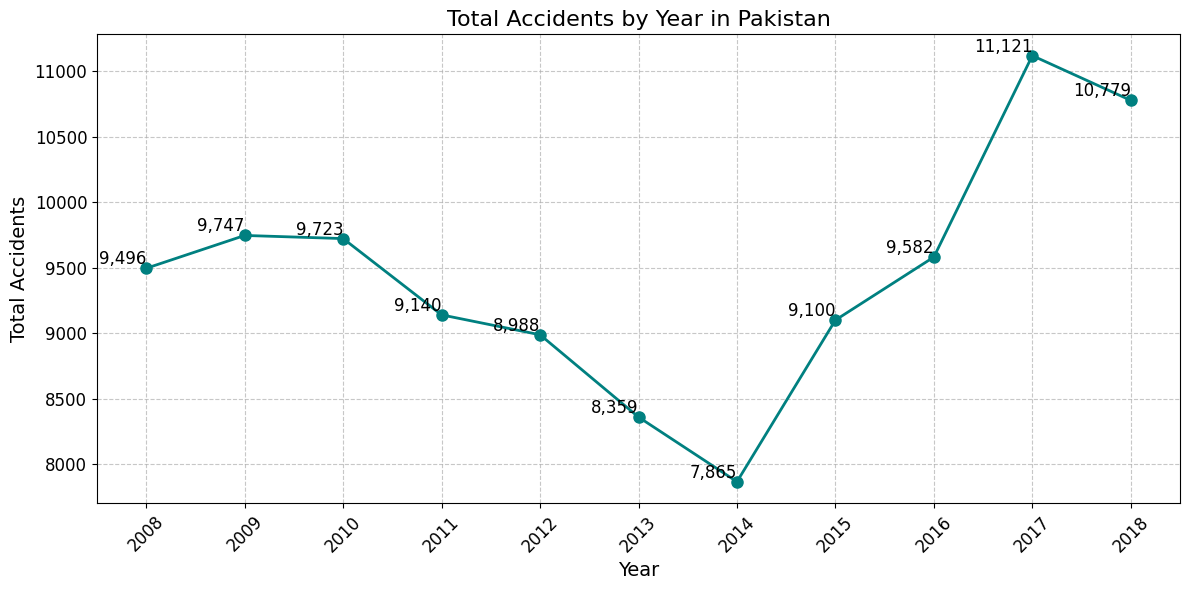

In [3]:
# Filter data for Pakistan
df_pakistan = df[df['Location'] == 'Pakistan']

# Set the color palette
sns.set_palette("muted")

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_pakistan['Year'], df_pakistan['Total Accidents'], marker='o', linestyle='-', color='teal', markersize=8, linewidth=2)

# Add titles and labels
plt.xlabel('Year', fontsize=14)
plt.ylabel('Total Accidents', fontsize=14)
plt.title('Total Accidents by Year in Pakistan', fontsize=16)

# Style the gridlines
plt.grid(True, linestyle='--', alpha=0.7)

# Rotate x labels for better readability
plt.xticks(df_pakistan['Year'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add data labels
for x, y in zip(df_pakistan['Year'], df_pakistan['Total Accidents']):
    plt.text(x, y, f'{y:,}', ha='right', va='bottom', fontsize=12, color='black')

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

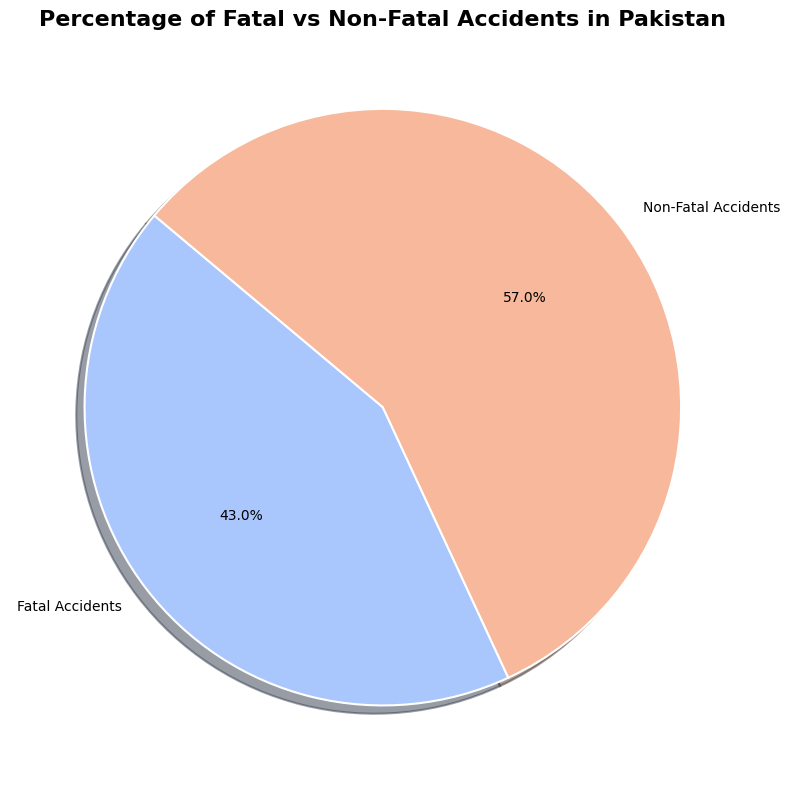

In [4]:
# Calculate totals
total_accidents = df_pakistan['Total Accidents'].sum()
total_fatal_accidents = df_pakistan['Fatal Accidents'].sum()
total_non_fatal_accidents = df_pakistan['Non-Fatal Accidents'].sum()

# Compute percentages
percentage_fatal = (total_fatal_accidents / total_accidents) * 100
percentage_non_fatal = (total_non_fatal_accidents / total_accidents) * 100

# Prepare data for pie chart
labels = ['Fatal Accidents', 'Non-Fatal Accidents']
sizes = [percentage_fatal, percentage_non_fatal]
colors = sns.color_palette("coolwarm", 2)  # Use a modern color palette

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, shadow=True, wedgeprops=dict(edgecolor='w', linewidth=1.5))

# Add a title
plt.title('Percentage of Fatal vs Non-Fatal Accidents in Pakistan', fontsize=16, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

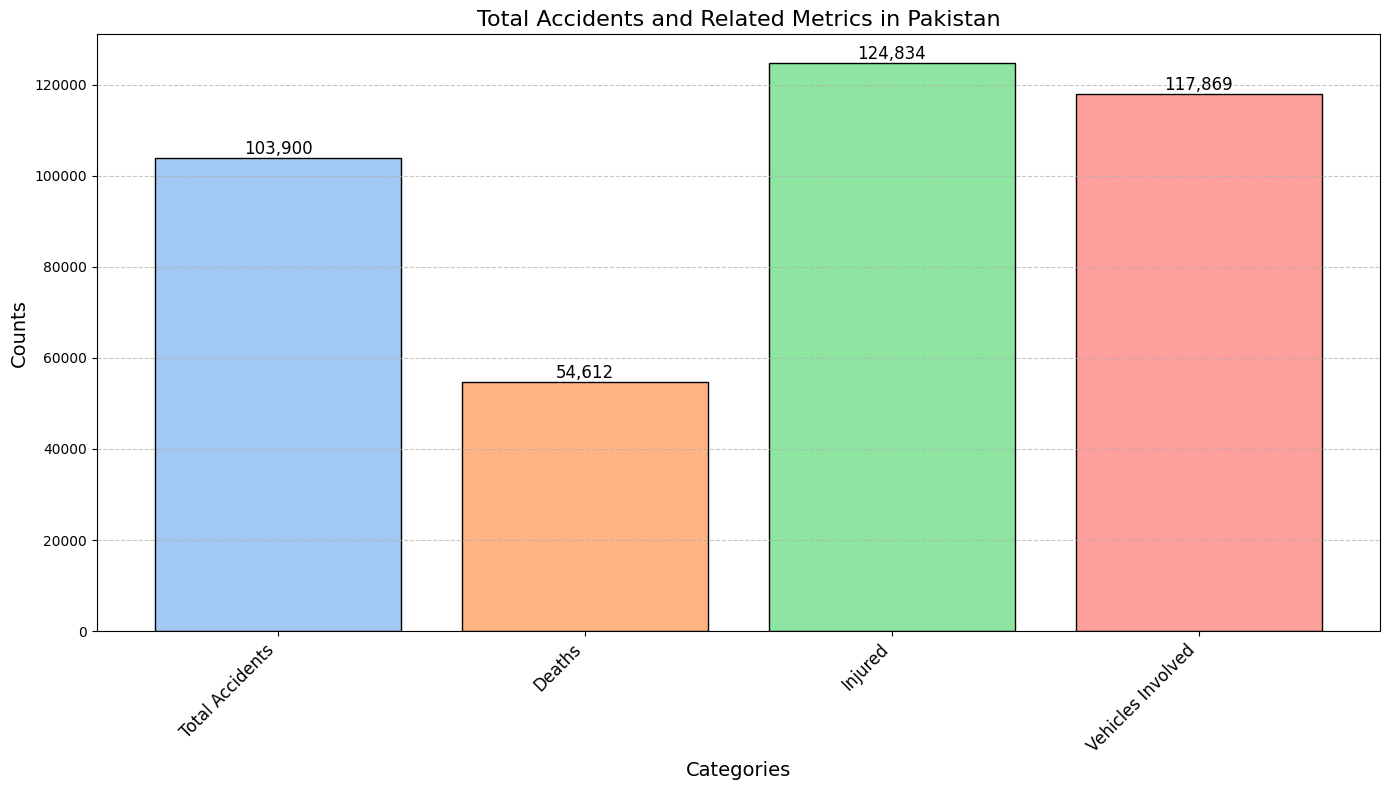

In [5]:
# Calculate totals
total_accidents = df_pakistan['Total Accidents'].sum()
total_deaths = df_pakistan['Deaths'].sum()
total_injured = df_pakistan['Injured'].sum()
total_vehicles_involved = df_pakistan['Total Vehicles Involved'].sum()

# Prepare data for plotting
categories = ['Total Accidents', 'Deaths', 'Injured', 'Vehicles Involved']
values = [total_accidents, total_deaths, total_injured, total_vehicles_involved]

# Set the color palette
palette = sns.color_palette("pastel", len(categories))

# Plotting
plt.figure(figsize=(14, 8))
bars = plt.bar(categories, values, color=palette, edgecolor='black')

# Add titles and labels
plt.xlabel('Categories', fontsize=14)
plt.ylabel('Counts', fontsize=14)
plt.title('Total Accidents and Related Metrics in Pakistan', fontsize=16)

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{int(yval):,}', 
             va='bottom', ha='center', fontsize=12, color='black')

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

             Location  Total Accidents  Percentage
0              Punjab            49354   47.501444
1               Sindh            11607   11.171319
2  Khyber Pakhtunkhwa            37237   35.839269
3         Balochistan             4062    3.909528
4           Islamabad             1640    1.578441


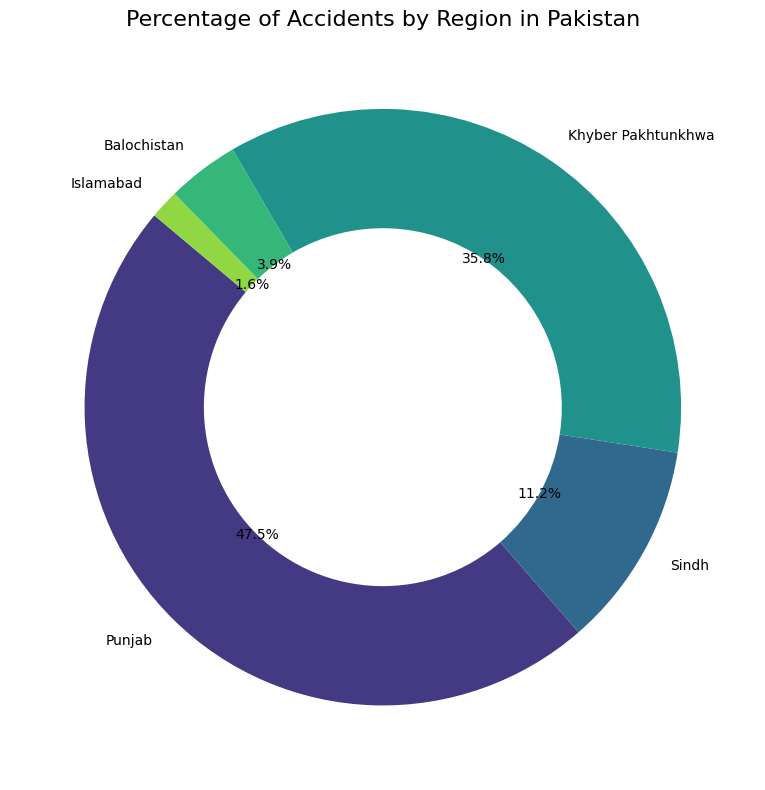

In [6]:
# Filter out Pakistan from the DataFrame
df_filtered = df[df['Location'] != 'Pakistan']

# Prepare data for plotting
# Initialize a list to store percentage data
percentage_data = []

# Filter data for each region and calculate percentages
for location in df_filtered['Location'].unique():
    df_region = df_filtered[df_filtered['Location'] == location]
    total_accidents_region = df_region['Total Accidents'].sum()
    percentage_region = (total_accidents_region / total_accidents) * 100
    percentage_data.append((location, total_accidents_region, percentage_region))

# Convert the percentage data to a DataFrame for easier handling
df_percentages = pd.DataFrame(percentage_data, columns=['Location', 'Total Accidents', 'Percentage'])

# Print the DataFrame with percentages
print(df_percentages)

# Set the color palette
palette = sns.color_palette("viridis", len(df_percentages))

# Plotting the pie chart
plt.figure(figsize=(10, 8))
plt.pie(df_percentages['Percentage'], labels=df_percentages['Location'], colors=palette, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4))

# Add a title
plt.title('Percentage of Accidents by Region in Pakistan', fontsize=16)

# Show the plot
plt.tight_layout()

# Show the plot
plt.show()